# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:
1.   Inisialisasi jumlah kluster k awal secara random
2.   Meletakkan posisi centroid secara random sejumlah k
3.   Menghitung jarak antara cetroid dengan setiap data yang ada kemudian assign data tersebut pada jarak centroid terdekat dan membuat sejumlah k kluster
4.   Menghitung ulang setiap jarak antar data pada kluster yang terbentuk dan menentukan posisi centroid yang baru.
5.   Menentukan kluster baru dengan memasukkan data dengan jarak terdekat pada centroid yang baru. Jika terjadi perubahan pada member kluster, maka kembali ke step 4 untuk menghitung ulang hingga jumlah member pada kluster tidak mengalami perubahan lagi.







---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










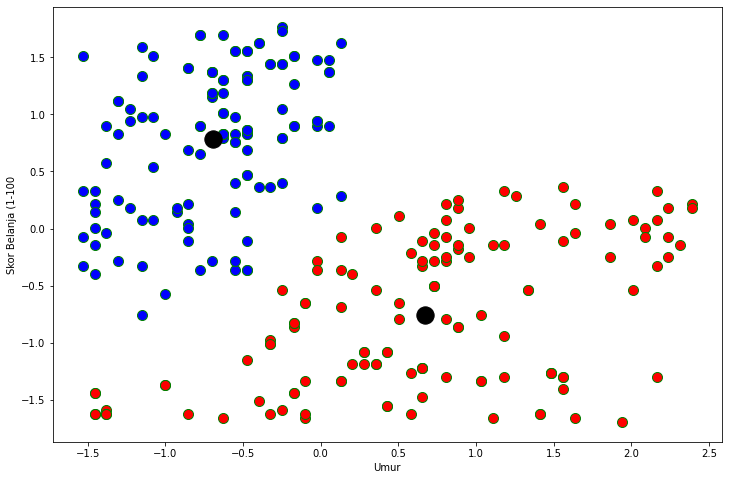

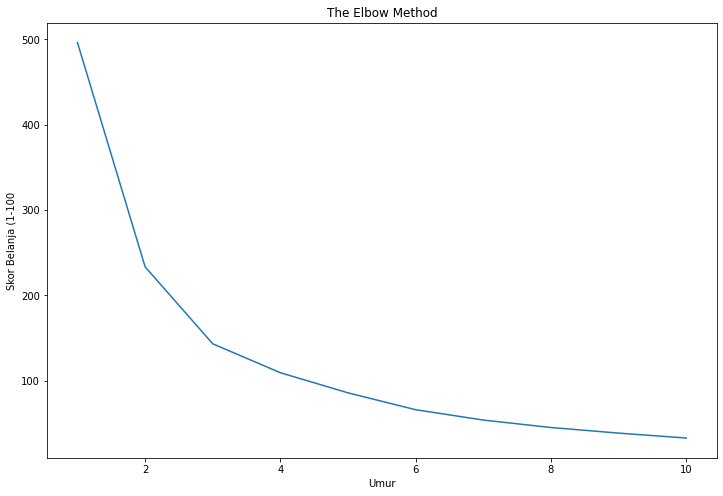

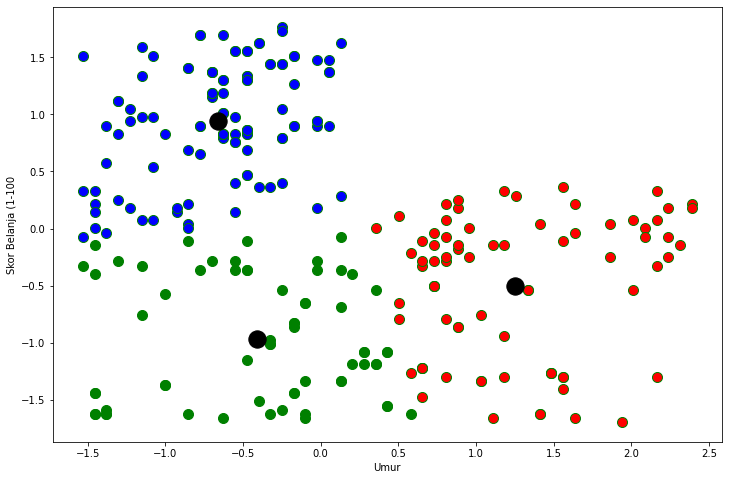

0.48555152598842644
0.4658669848365053


In [42]:
#code here
import numpy as np

df1 = df[['Umur', 'Skor Belanja (1-100)']]
df1 = df1.fillna(method="ffill")

def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

df2 = remove_outlier(df1)
df2.dropna(axis=0, inplace=True)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

from sklearn.cluster import KMeans
# n=2
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['label1_kmeans'] = labels1

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label1_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')
plt.show()

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')

plt.show()

# n=3
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels2 = kmeans2.labels_

new_df2 = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df2['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_df2['Umur'][new_df2.label2_kmeans == 0], new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2['Umur'][new_df2.label2_kmeans == 1], new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df2['Umur'][new_df2.label2_kmeans == 2], new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')
plt.show()

from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels=labels1))
print(silhouette_score(df_std, labels=labels2))


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



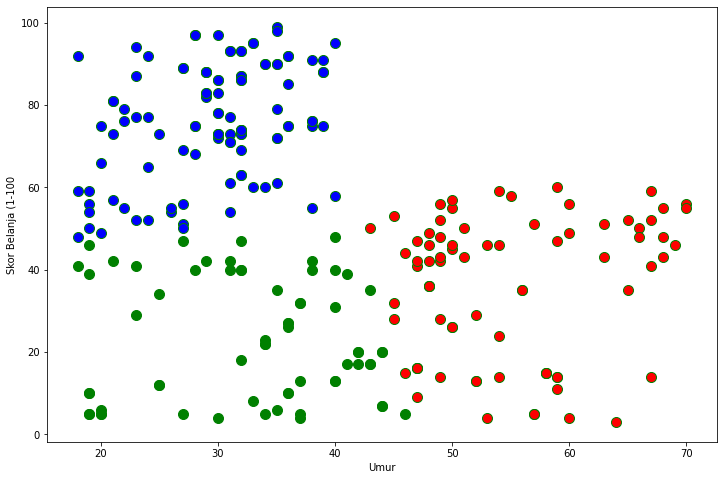

In [46]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels3 = kmeans3.labels_

new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Umur', 'Skor Belanja (1-100)'])
new_df1['label3_kmeans'] = labels3

plt.figure(figsize=(12,8))

plt.scatter(new_df1['Umur'][new_df1.label3_kmeans == 0], new_df1['Skor Belanja (1-100)'][new_df1.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Umur'][new_df1.label3_kmeans == 1], new_df1['Skor Belanja (1-100)'][new_df1.label3_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df1['Umur'][new_df1.label3_kmeans == 2], new_df1['Skor Belanja (1-100)'][new_df1.label3_kmeans == 2], c='green', s=100, edgecolor='green')

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')
plt.show()

# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Data menunjukkan adanya kluster yang berbeda pada pelanggan supermarket dari segi Umur dan Skor Berbelanja mereka. Terdapat 3 jenis kluster pelanggan berdasarkan rentang umur dan skor belanjanya.
*   Pelanggan pada rentang umur di bawah 40 memiliki 2 jenis kluster berdasarkan skor belanjanya, yaitu pada rentang sekitar 0 - 50 dan 50 - 100.
*   Pelanggan pada rentang umur di atas 40 hanya memiliki skor belanja di kisaran rentang 0 - 50

Hal-hal yang dapat dilakukan adalah:
*   Menaikkan skor belanja untuk umur di atas 40 dengan memberikan promosi khusus atau produk khusus bagi pelanggan di rentang umur tersebut
*   Menaikkan skor belanja pada umur di bawah 40 dengan memberikan promosi yang lebih baik lagi dikarenakan pada rentang umur tersebut, sudah ada pelanggan juga yang memiliki skor berbelanja lebih tinggi
*   Mempertahankan skor belanja pelanggan yang memiliki skor tinggi dengan memberikan program yang lebih intimate bagi pelanggan seperti membership, reward atau personal promotion.



